
# 02 – IQR and Robust Statistics

**Module:** Anomaly & Fraud Detection  
**Topic:** Statistical Methods for Anomaly Detection

This notebook demonstrates **Interquartile Range (IQR)** and other robust statistical techniques
to detect extreme values or outliers in tabular datasets.


## Objective

Build a workflow that:
- Detects anomalies using distribution-robust measures
- Supports Winsorization and robust scaling
- Preserves temporal or transactional causality
- Provides interpretable flags for business use


## Design Principles

✔ Avoids sensitivity to extreme outliers  
✔ Scalable to multivariate datasets  
✔ Integrates easily into anomaly detection pipelines  
✔ Compatible with both EDA and monitoring


## High-Level Workflow
Raw Data  
&nbsp;&nbsp;&nbsp;&nbsp;↓  
Compute IQR & Thresholds  
&nbsp;&nbsp;&nbsp;&nbsp;↓  
Flag Outliers / Apply Winsorization  
&nbsp;&nbsp;&nbsp;&nbsp;↓  
Optional: Robust Scaling  
&nbsp;&nbsp;&nbsp;&nbsp;↓  
Integration into Detection Pipeline


## Imports and Setup


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(2010)

## Simulated Dataset with Outliers

In [19]:
data = np.random.normal(loc=50, scale=5, size=1000)
data = np.append(data, [100, 120, 130])  # add extreme outliers

df = pd.DataFrame({'value': data})
df.head()

,value
0,49.471482
1,47.453517
2,53.672418
3,49.896006
4,37.919214


## Compute IQR and Identify Outliers

In [22]:
Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['outlier_iqr'] = ((df['value'] < lower_bound) | (df['value'] > upper_bound))
print(df['outlier_iqr'].value_counts())

outlier_iqr
False    995
True       8
Name: count, dtype: int64


## Winsorization

In [25]:
lower_cap = df['value'].quantile(0.05)
upper_cap = df['value'].quantile(0.95)

df['value_winsor'] = np.clip(df['value'], lower_cap, upper_cap)

# %%

##  Robust Scaling

In [28]:
median = df['value_winsor'].median()
mad = np.median(np.abs(df['value_winsor'] - median))  # Median Absolute Deviation

df['value_robust_scaled'] = (df['value_winsor'] - median) / (mad + 1e-9)

 ## Visualization

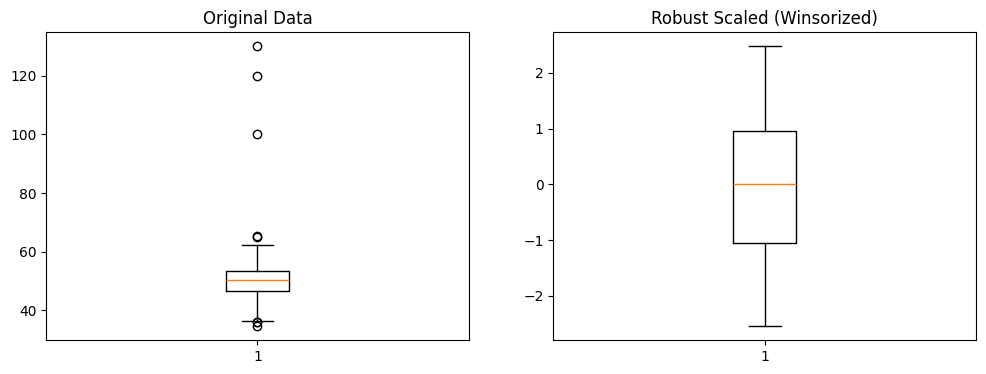

In [31]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.boxplot(df['value'])
plt.title('Original Data')

plt.subplot(1,2,2)
plt.boxplot(df['value_robust_scaled'])
plt.title('Robust Scaled (Winsorized)')

plt.show()


##  Integration Notes

- IQR and robust statistics can be applied **per feature** for multivariate data  
- Outlier flags can feed into downstream ML models or alerting systems  
- Winsorization and robust scaling reduce the impact of extreme anomalies on models


## Production Checklist

✔ Feature-wise application  
✔ Thresholds validated on historical data  
✔ Outlier flags interpreted for business relevance  
✔ Scaled values used consistently across pipeline


## Key Takeaways

- IQR-based detection is simple, interpretable, and robust  
- Winsorization reduces skew without removing data  
- Robust scaling ensures ML models are less sensitive to extreme values


## Next Steps

- Extend to multivariate robust detection (Mahalanobis distance, robust covariance)  
- Combine with ML-based anomaly detection (Isolation Forest, One-Class SVM)  
- Integrate flags into real-time anomaly monitoring pipelines